In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv("C:\\Users\\hp\\Desktop\\Projects Data\\Train.csv")

In [31]:
# Data Exploration
dataset.info()
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
  Item_Identifier  Item_Weight Item_Fat_Conte

In [43]:
# Handling missing values safely
dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())

outlet_size_mode = dataset.groupby('Outlet_Type')['Outlet_Size'].transform(
    lambda x: x.mode()[0] if not x.mode().empty else "Unknown"
)
dataset['Outlet_Size'] = outlet_size_mode

In [47]:
# Descriptive statistic
print(dataset.describe())
print(dataset.select_dtypes(include='object').nunique())


       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
Item_Identifier         1559
Item_Fat_Content

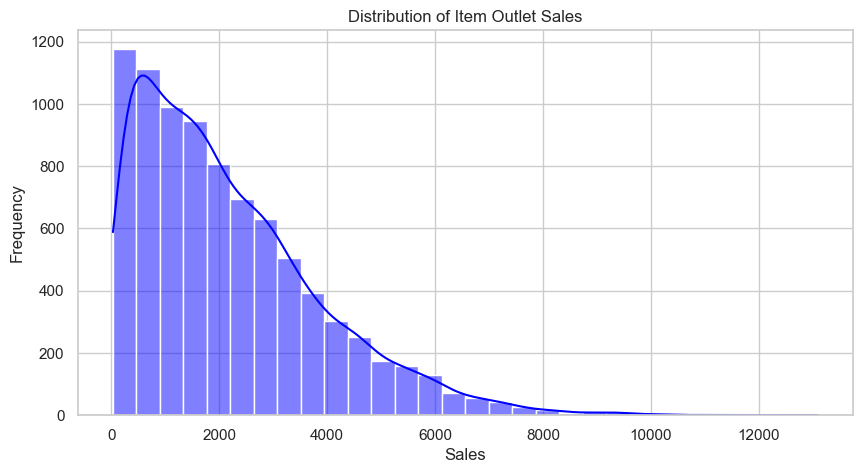

In [51]:
# Data Visualization
sns.set_theme(style="whitegrid")

# Distribution of Item_Outlet_Sales
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Item_Outlet_Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [65]:
# Remove underscores from column names
dataset.columns = dataset.columns.str.replace('_', ' ', regex=False)

# Display updated column names
print("Updated Column Names:")
print(dataset.columns)

Updated Column Names:
Index(['Item Identifier', 'Item Weight', 'Item Fat Content', 'Item Visibility',
       'Item Type', 'Item MRP', 'Outlet Identifier',
       'Outlet Establishment Year', 'Outlet Size', 'Outlet Location Type',
       'Outlet Type', 'Item Outlet Sales'],
      dtype='object')


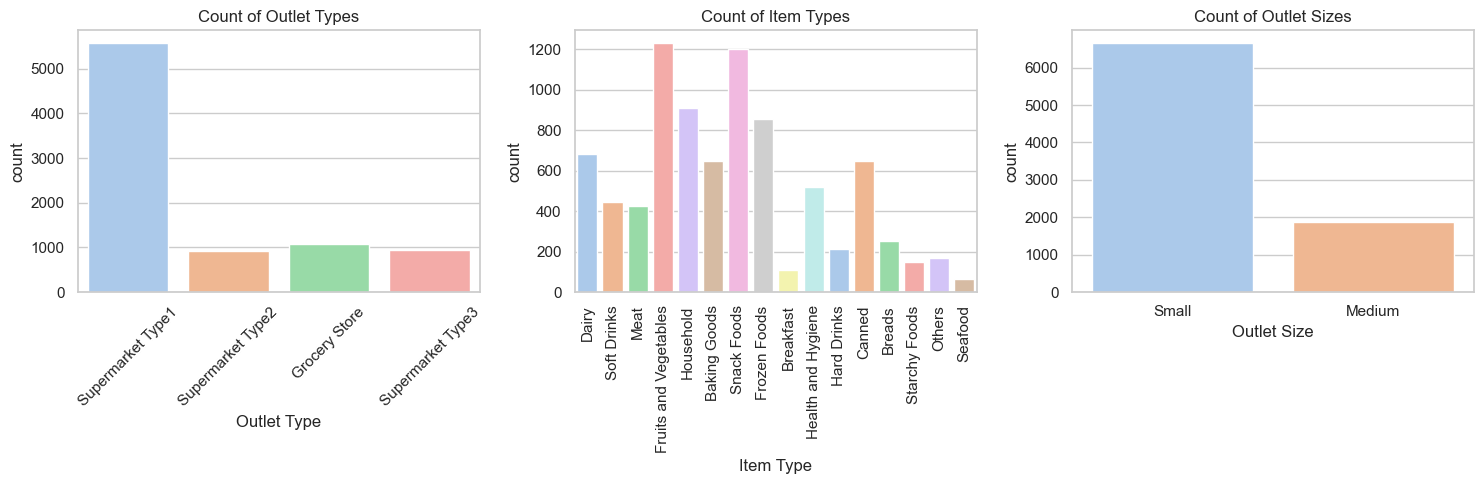

In [69]:
# Count plots for Outlet Type, Item Type, and Outlet Size
plt.figure(figsize=(15, 5))

# Plot for Outlet Type
plt.subplot(1, 3, 1)
sns.countplot(data=dataset, x='Outlet Type', hue='Outlet Type', palette='pastel')
plt.title('Count of Outlet Types')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Hides legend as it's not needed

# Plot for Item Type
plt.subplot(1, 3, 2)
sns.countplot(data=dataset, x='Item Type', hue='Item Type', palette='pastel')
plt.title('Count of Item Types')
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)

# Plot for Outlet Size
plt.subplot(1, 3, 3)
sns.countplot(data=dataset, x='Outlet Size', hue='Outlet Size', palette='pastel')
plt.title('Count of Outlet Sizes')
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

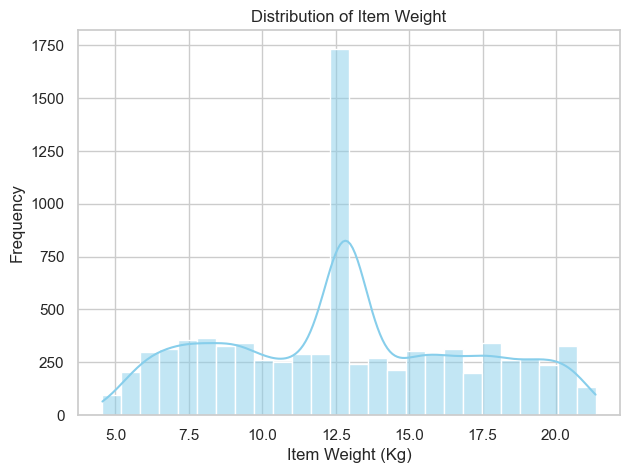

In [73]:
# Distribution of Item Weight
plt.figure(figsize=(7, 5))
sns.histplot(dataset['Item Weight'], kde=True, color='skyblue')
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight (Kg)')
plt.ylabel('Frequency')
plt.show()

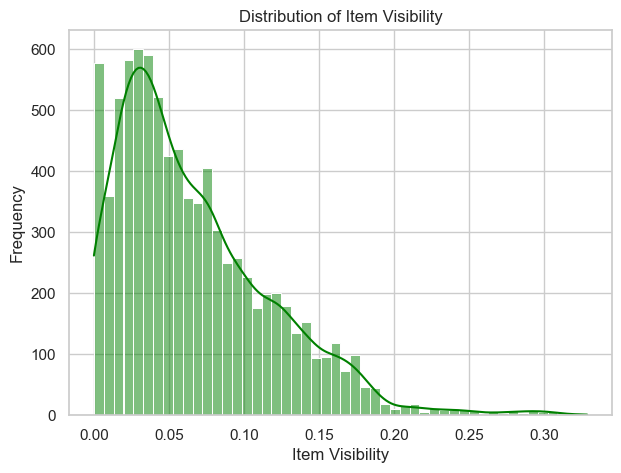

In [77]:
# Distribution of Item Visibility
plt.figure(figsize=(7, 5))
sns.histplot(dataset['Item Visibility'], kde=True, color='green')
plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

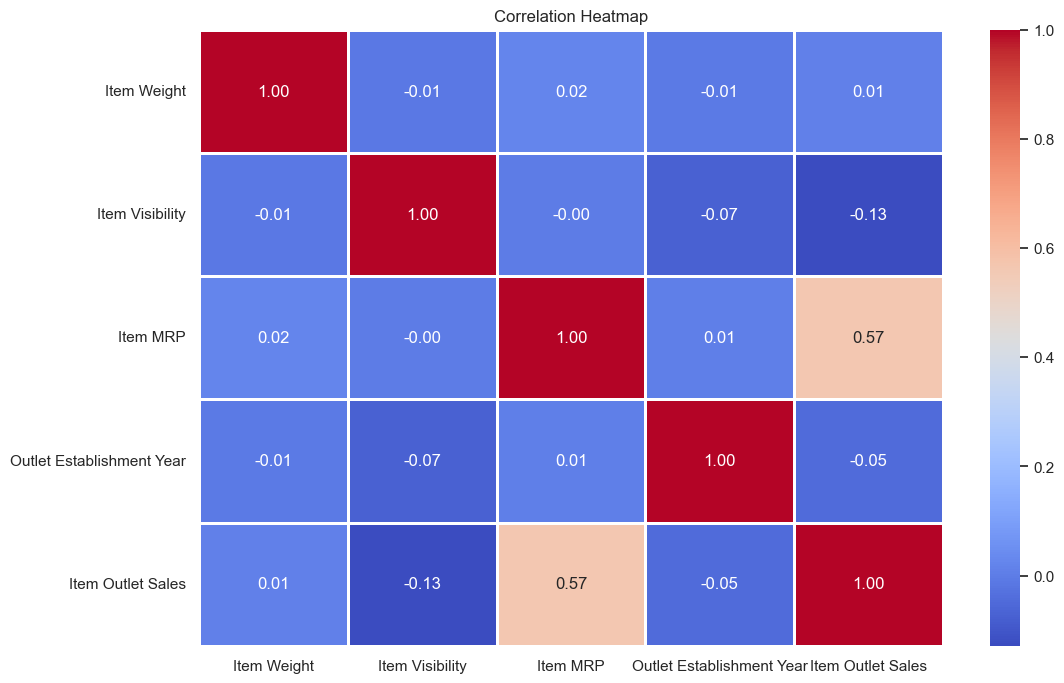

In [83]:
# Select only numeric columns for correlation calculation
numeric_columns = dataset.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


In [87]:
print(dataset.columns)

Index(['Item Identifier', 'Item Weight', 'Item Fat Content', 'Item Visibility',
       'Item Type', 'Item MRP', 'Outlet Identifier',
       'Outlet Establishment Year', 'Outlet Size', 'Outlet Location Type',
       'Outlet Type', 'Item Outlet Sales'],
      dtype='object')


In [93]:
dataset.columns = dataset.columns.str.strip()

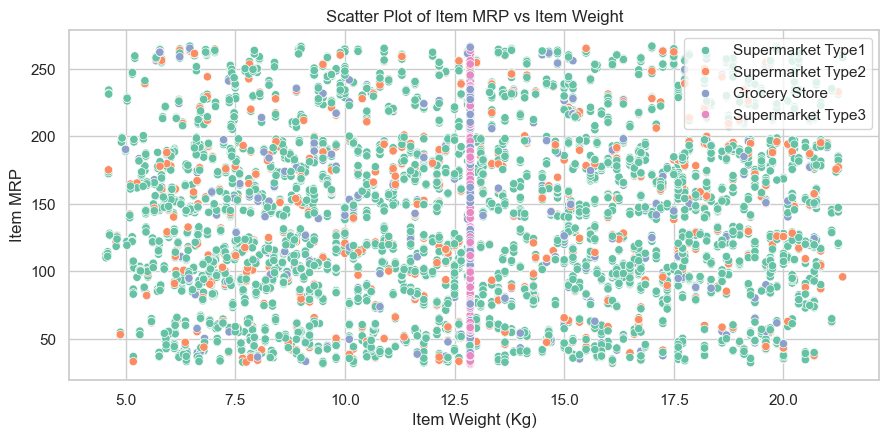

In [103]:
# Cleaning up column names by removing leading/trailing spaces
dataset.columns = dataset.columns.str.strip()

# Creating a figure for subplots
plt.figure(figsize=(23, 10))

# Scatter plot for Item Weight vs Item MRP
plt.subplot(2, 2, 1)
sns.scatterplot(data=dataset, x='Item Weight', y='Item MRP', hue='Outlet Type', palette='Set2')
plt.title('Scatter Plot of Item MRP vs Item Weight')
plt.xlabel('Item Weight (Kg)')
plt.ylabel('Item MRP')
plt.legend(loc='upper right')

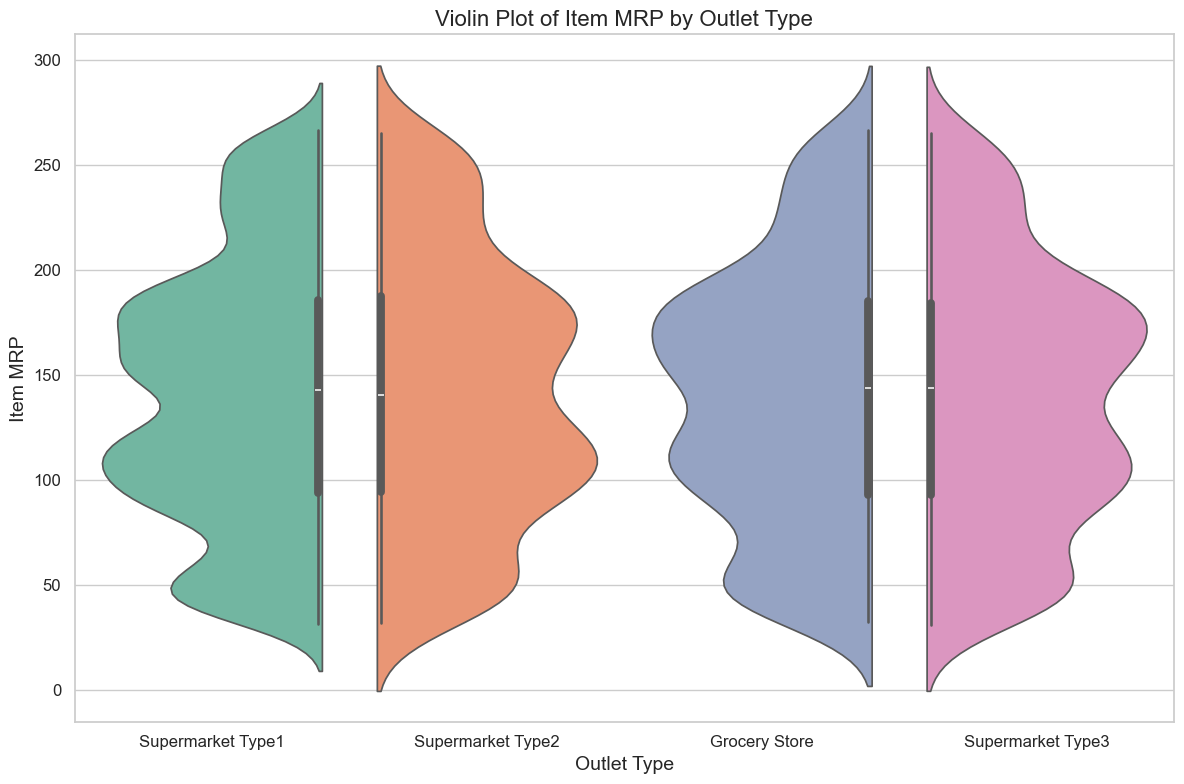

In [117]:
# Create a larger figure for subplots
plt.figure(figsize=(12, 8))

# Violin plot for Item MRP by Outlet Type with hue assigned
plt.subplot(1, 1, 1)
sns.violinplot(data=dataset, x='Outlet Type', y='Item MRP', hue='Outlet Type', palette='Set2', split=True)
plt.title('Violin Plot of Item MRP by Outlet Type', fontsize=16)  # Increase title font size
plt.xlabel('Outlet Type', fontsize=14)  # Increase xlabel font size
plt.ylabel('Item MRP', fontsize=14)  # Increase ylabel font size

# Make tick labels larger
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout to ensure everything fits
plt.tight_layout()

plt.show()


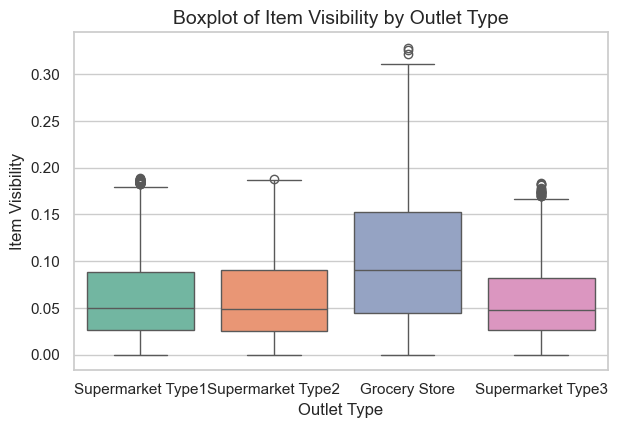

In [123]:
# Create a larger figure for subplots
plt.figure(figsize=(12, 8))

# Boxplot for Item Visibility by Outlet Type with hue assigned
plt.subplot(2, 2, 4)
sns.boxplot(data=dataset, x='Outlet Type', y='Item Visibility', hue='Outlet Type', palette='Set2')
plt.title('Boxplot of Item Visibility by Outlet Type', fontsize=14)  
plt.ylabel('Item Visibility', fontsize=12)  

# Adjust the layout to ensure everything fits
plt.tight_layout()
# Show plot
plt.show()

In [135]:
# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Calculate and display the correlation matrix for numeric columns
print(numeric_columns.corr())

                           Item Weight  Item Visibility  Item MRP  \
Item Weight                   1.000000        -0.012049  0.024756   
Item Visibility              -0.012049         1.000000 -0.001315   
Item MRP                      0.024756        -0.001315  1.000000   
Outlet Establishment Year    -0.008301        -0.074834  0.005020   
Item Outlet Sales             0.011550        -0.128625  0.567574   

                           Outlet Establishment Year  Item Outlet Sales  
Item Weight                                -0.008301           0.011550  
Item Visibility                            -0.074834          -0.128625  
Item MRP                                    0.005020           0.567574  
Outlet Establishment Year                   1.000000          -0.049135  
Item Outlet Sales                          -0.049135           1.000000  


In [141]:
# Display the first few rows of the dataset
print(dataset.head())

# Display basic statistics of the dataset
print(dataset.describe())

# Display data types of each column
print(dataset.dtypes)

# Check for missing values in the dataset
print(dataset.isnull().sum())

# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Print the number of unique values for each categorical column
for col in categorical_columns:
    print(f"{col}: {dataset[col].nunique()} unique values")

# Filter only numeric columns before calculating correlation
numeric_dataset = dataset.select_dtypes(include=['number', 'float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
print(numeric_dataset.corr())

# Print summary of each categorical column
for col in categorical_columns:
    print(f"\n{col} summary:")
    print(dataset[col].value_counts())


  Item Identifier  Item Weight Item Fat Content  Item Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item Type  Item MRP Outlet Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet Establishment Year Outlet Size Outlet Location Type  \
0                       1999       Small               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999       Small               Tier